<a href="https://colab.research.google.com/github/soniapachecomza/python-practica/blob/main/Creando_Agrupamientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reporte de Análisis VII

#Creando agrupamientos

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('alquiler_residencial.csv', sep = ';')

In [3]:
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
1,Casa,Lurigancho,2,0,1,100,7000.0,NaN,NaN
2,Local comercial,Ate,0,4,0,150,5200.0,4020.0,1111.0
3,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
4,Departamento,Ate,1,0,0,48,800.0,230.0,NaN
5,Departamento,Barranco,3,1,0,70,1200.0,NaN,NaN
6,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0
7,Casa en condominio,Ate,5,4,5,750,22000.0,NaN,NaN
8,Casa en condominio,El Agustino,2,2,0,65,1000.0,NaN,NaN
9,Local comercial,Pachacámac,0,3,0,695,35000.0,19193.0,3030.0


#https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats

In [4]:
datos['Valor'].mean()

12952.659715265761

In [5]:
barrios = ['Ate', 'Barranco', 'Comas', 'Lince', 'El Agustino', 'San Luis', 'Callao']
seleccion = datos['Distrito'].isin(barrios)
datos = datos[seleccion]

In [6]:
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
2,Local comercial,Ate,0,4,0,150,5200.0,4020.0,1111.0
4,Departamento,Ate,1,0,0,48,800.0,230.0,NaN
5,Departamento,Barranco,3,1,0,70,1200.0,NaN,NaN
6,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0
7,Casa en condominio,Ate,5,4,5,750,22000.0,NaN,NaN
8,Casa en condominio,El Agustino,2,2,0,65,1000.0,NaN,NaN
18,Casa en condominio,San Luis,3,1,1,115,2000.0,NaN,NaN
19,Departamento,Callao,3,0,0,54,950.0,300.0,28.0
20,Departamento,Ate,2,1,1,67,1700.0,589.0,147.0
22,Casa en condominio,Ate,4,3,2,466,7500.0,2695.0,NaN


In [7]:
datos['Distrito'].drop_duplicates()

2             Ate
5        Barranco
6           Comas
8     El Agustino
18       San Luis
19         Callao
29          Lince
Name: Distrito, dtype: object

In [8]:
grupo_barrio = datos.groupby('Distrito')

In [9]:
type(grupo_barrio)

pandas.core.groupby.generic.DataFrameGroupBy

In [10]:
grupo_barrio.groups

{'Ate': [2, 4, 7, 20, 22, 30, 35, 41, 44, 49, 59, 60, 76, 78, 81, 89, 90, 91, 93, 97, 103, 104, 111, 112, 115, 117, 134, 146, 155, 156, 157, 158, 159, 163, 165, 168, 172, 176, 179, 192, 194, 197, 199, 203, 225, 228, 230, 247, 248, 251, 255, 260, 261, 274, 277, 281, 306, 315, 325, 330, 332, 340, 347, 348, 354, 358, 364, 365, 368, 374, 387, 390, 399, 401, 408, 416, 419, 434, 440, 441, 442, 444, 452, 455, 456, 465, 470, 471, 493, 499, 505, 509, 512, 513, 522, 530, 544, 546, 554, 558, ...], 'Barranco': [5, 259, 1534, 1715, 2519, 2619, 3006, 3139, 3305, 3565, 3986, 4012, 4159, 4543, 4881, 4966, 5397, 5637, 6524, 7235, 7291, 7648, 8034, 8389, 8410, 9260, 9363, 9530, 9892, 11314, 11852, 12408, 13832, 14504, 14567, 14832, 15010, 15398, 16465, 16530, 16804, 17279, 17455, 17707, 17823, 18459, 18554, 18579, 19016, 19374, 19521, 20314, 20453, 20827, 21488, 21593, 21658, 22426, 22791, 23421, 23470, 23874, 24262, 24696, 25103, 25312, 25352, 25854, 25868, 26030, 26658, 26905, 27456, 28332, 28399, 284

In [12]:
for barrio, data in grupo_barrio:
  print('{} -> {}'.format(barrio, data.Valor.mean()))

Ate -> 8881.576398683592
Barranco -> 1555.2222222222222
Callao -> 4746.6391184573
Comas -> 9709.934942716858
El Agustino -> 89290.31182795699
Lince -> 105049.1566164154
San Luis -> 3752.8425460636518


In [14]:
grupo_barrio['Valor'].mean().round(2)

Distrito
Ate              8881.58
Barranco         1555.22
Callao           4746.64
Comas            9709.93
El Agustino     89290.31
Lince          105049.16
San Luis         3752.84
Name: Valor, dtype: float64

In [20]:
grupo_barrio[['Valor', 'Mantenimiento']].mean().round(2)

,Valor,Mantenimiento
Distrito,,
Ate,8881.58,3560.28
Barranco,1555.22,477.05
Callao,4746.64,764.78
Comas,9709.93,2227.20
El Agustino,89290.31,1493.95
Lince,105049.16,910.14
San Luis,3752.84,576.90


#Estadísticas Descriptivas

In [21]:
grupo_barrio['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Distrito,,,,,,,,
Ate,6381.0,8881.58,29913.64,100.0,1990.0,3500.0,8000.0,738197.0
Barranco,90.0,1555.22,2055.89,400.0,712.5,975.0,1200.0,12000.0
Callao,726.0,4746.64,36631.77,300.0,1000.0,1500.0,2300.0,800000.0
Comas,2444.0,9709.93,20103.40,100.0,3500.0,6400.0,10400.0,800000.0
El Agustino,186.0,89290.31,1099702.99,500.0,850.0,1100.0,2300.0,15000000.0
Lince,1194.0,105049.16,3472704.95,100.0,800.0,1200.0,2000.0,120000000.0
San Luis,597.0,3752.84,8322.49,75.0,990.0,1350.0,2200.0,79000.0


In [22]:
grupo_barrio['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo
Distrito,,
Ate,100.0,738197.0
Barranco,400.0,12000.0
Callao,300.0,800000.0
Comas,100.0,800000.0
El Agustino,500.0,15000000.0
Lince,100.0,120000000.0
San Luis,75.0,79000.0


In [23]:
datos['Valor'].mean()

19647.752453090034

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Text(0.5, 1.0, 'Valor medio Alquiler por Distrito')

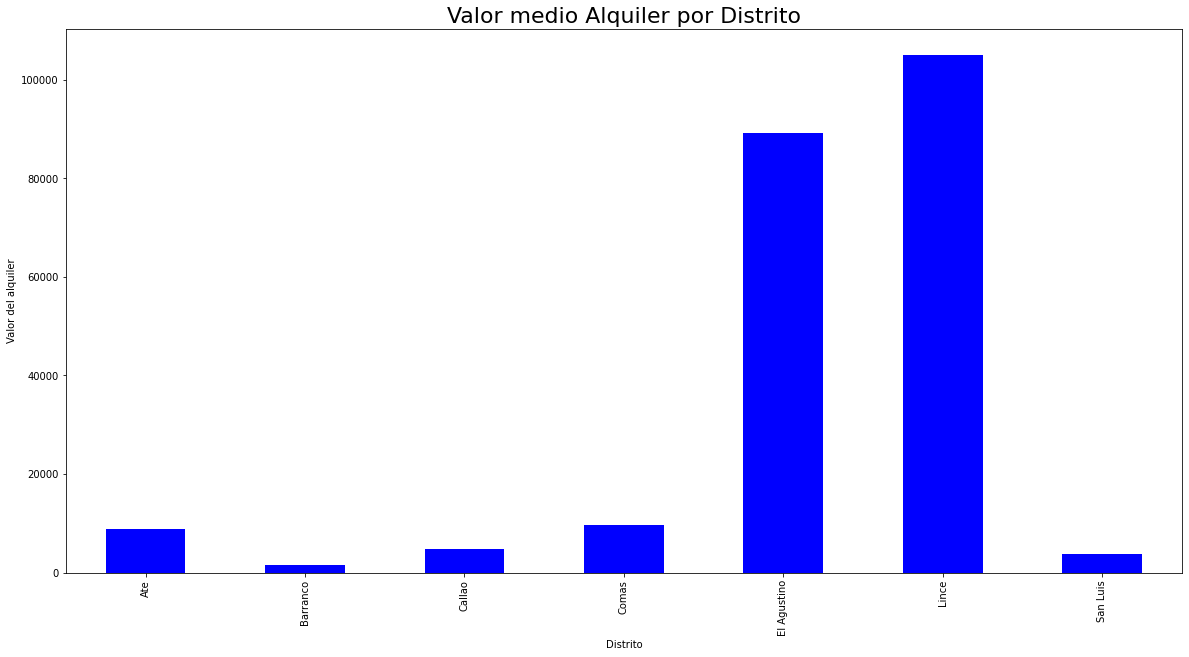

In [25]:
fig = grupo_barrio['Valor'].mean().plot.bar(color = 'Blue')
fig.set_ylabel('Valor del alquiler')
fig.set_title('Valor medio Alquiler por Distrito', {'fontsize':22})

Text(0.5, 1.0, 'Valor medio Alquiler por Distrito')

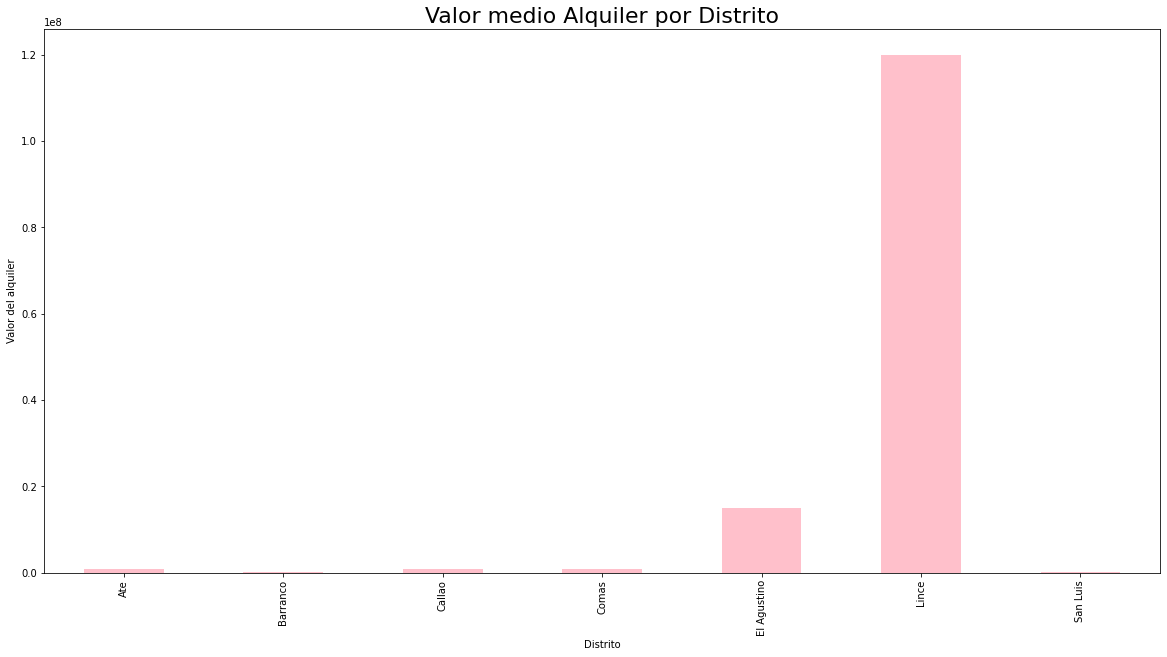

In [26]:
fig = grupo_barrio['Valor'].max().plot.bar(color = 'pink')
fig.set_ylabel('Valor del alquiler')
fig.set_title('Valor medio Alquiler por Distrito', {'fontsize':22})

In [15]:
import pandas as pd
alumnos = pd.DataFrame({
'Nombre': ['Ary', 'Katia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
'Edad': [15, 27, 56, 32, 42, 21, 19, 35], 
'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
'Aprobado': [True, False, False, True, True, True, False, False]}, 
columns = ['Nombre', 'Edad', 'Sexo', 'Notas', 'Aprobado'])

In [16]:
sexo = alumnos.groupby('Sexo')
sexo = pd.DataFrame(sexo['Notas'].mean().round(2))
sexo.columns = ['Notas Médias']
sexo

,Notas Médias
Sexo,
F,5.82
M,7.12


In [19]:
sexo = alumnos.groupby('Sexo')
sexo = pd.DataFrame(sexo['Notas'].mean())
sexo.columns = ['Notas Médias']
sexo

,Notas Médias
Sexo,
F,5.825
M,7.125


In [27]:
precios = pd.DataFrame([
['Feria', 'Cebolla', 2.5], 
         ['Mercado', 'Cebolla', 1.99], 
         ['Supermercado', 'Cebolla', 1.69], 
         ['Feria', 'Tomate', 4], 
         ['Mercado', 'Tomate', 3.29], 
         ['Supermercado', 'Tomate', 2.99], 
         ['Feria', 'Papa', 4.2], 
         ['Mercado', 'Papa', 3.99], 
         ['Supermercado', 'Papa', 3.69]], 
columns = ['Local', 'Producto', 'Precio'])
precios

,Local,Producto,Precio
0,Feria,Cebolla,2.50
1,Mercado,Cebolla,1.99
2,Supermercado,Cebolla,1.69
3,Feria,Tomate,4.00
4,Mercado,Tomate,3.29
5,Supermercado,Tomate,2.99
6,Feria,Papa,4.20
7,Mercado,Papa,3.99
8,Supermercado,Papa,3.69


In [28]:
productos = precios.groupby('Producto')
productos.describe().round(2)

Precio                                         
          count  mean   std   min   25%   50%   75%  max
Producto                                                
Cebolla     3.0  2.06  0.41  1.69  1.84  1.99  2.24  2.5
Papa        3.0  3.96  0.26  3.69  3.84  3.99  4.10  4.2
Tomate      3.0  3.43  0.52  2.99  3.14  3.29  3.64  4.0

In [30]:
estadisticas = ['mean', 'std', 'min', 'max']
nombres = {'mean': 'Promedio', 'std': 'Desviación Estándar','min': 'Mínimo', 'max': 'Máximo'}
productos['Precio'].aggregate(estadisticas).rename(columns = nombres).round(2)

,Promedio,Desviación Estándar,Mínimo,Máximo
Producto,,,,
Cebolla,2.06,0.41,1.69,2.5
Papa,3.96,0.26,3.69,4.2
Tomate,3.43,0.52,2.99,4.0


In [31]:
estadisticas = ['mean', 'std', 'min', 'max']
nombres = {'mean': 'Promedio', 'std': 'Desviación Estándar', 'min': 'Mínimo', 'max': 'Máximo'}
productos['Precio'].aggregate(estadisticas).rename(columns = nombres)


,Promedio,Desviación Estándar,Mínimo,Máximo
Producto,,,,
Cebolla,2.060000,0.409512,1.69,2.5
Papa,3.960000,0.256320,3.69,4.2
Tomate,3.426667,0.518684,2.99,4.0
